#Email Spam filteration by using Naive Bayes

In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv('/content/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [74]:
dummies = pd.get_dummies(df.Category)
dummies.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [75]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,Category,Message,ham,spam
0,ham,"Go until jurong point, crazy.. Available only ...",1,0
1,ham,Ok lar... Joking wif u oni...,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,ham,U dun say so early hor... U c already then say...,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,0


**Dropping ham column as well because of dummy variable trap theory. One column is enough to repressent ham vs spam**

In [76]:
df.drop(['Category','ham'],axis='columns',inplace=True)
df.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.3)

**Here we are using MultinomialNB() i.e Multinomial naive bayes method with the help of sklearn pipeline.**

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf = Pipeline(
    [
        ('vectorizer',CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

**Here, you're creating a pipeline named clf. This pipeline consists of two steps:**

1.  **'vectorizer' and CountVectorizer():**

CountVectorizer() is a scikit-learn class used for converting text documents to a matrix of token counts. It preprocesses text data by tokenizing strings and converting them into a matrix format where each row represents a document, and each column represents the frequency of a particular word (or token) in that document. 'vectorizer' is an arbitrary name given to this step in the pipeline.
2.   **'nb' and MultinomialNB():**

MultinomialNB() is a scikit-learn class representing the Multinomial Naive Bayes classifier, often used for classification tasks, especially with text data represented in counts. 'nb' is an arbitrary name given to this step in the pipeline.

In [79]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [80]:
clf.predict(x_test)

array([1, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [81]:
len(x_test)

1672

In [82]:
len(x_train)

3900

In [83]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow? I have a free ticket',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf.predict(emails)

array([0, 1], dtype=uint8)

In [84]:
clf.score(x_test,y_test)

0.9832535885167464

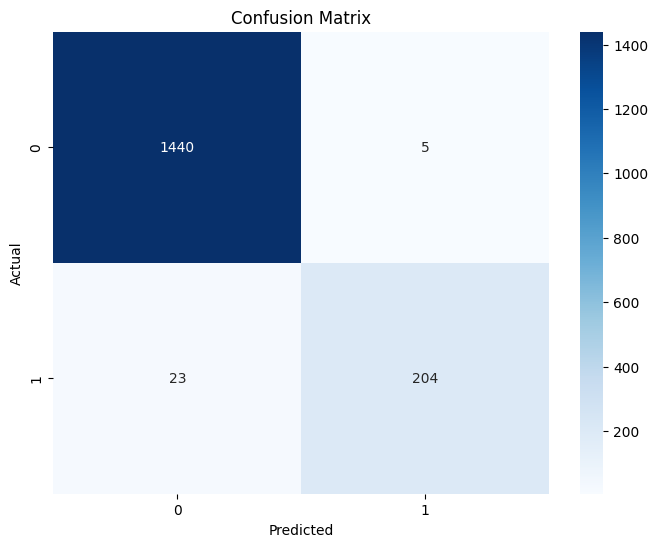

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#'clf' is our trained model and 'x_test', 'y_test' are our test data
predicted = clf.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)

# Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
